Notebook to showcase some additional results

In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
import pandas as pd
import funcs

In [31]:
plt.rc('font', family='serif')
plt.rc('text', usetex=True)
plt.rc('axes', axisbelow=True)

# Show Interest rate forecasts

Load the data

In [61]:
df = pd.read_excel('../../r_fremskrivning.xlsx')
# df

Set year as a date

In [62]:
df['År'] = pd.to_datetime(df['År'], format='%Y')

Plot the data

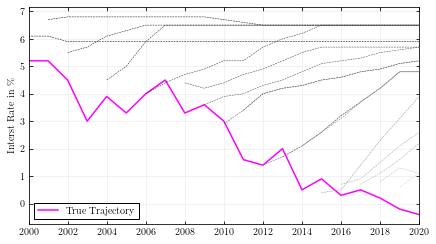

In [63]:
fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(1,1,1)

# Actual interest trajectory
ax.plot(df.År, df.Rente, color = 'magenta', label = 'True Trajectory')

# Forecasts
ax.plot(df.År, df['2000-prognose'], linestyle = '--', color = '0', linewidth = .5)
ax.plot(df.År, df['2001-prognose'], linestyle = '--', color = '0.04', linewidth = .5)
ax.plot(df.År, df['2002-prognose'], linestyle = '--', color = '0.09', linewidth = .5)
ax.plot(df.År, df['2004-prognose'], linestyle = '--', color = '0.14', linewidth = .5)
ax.plot(df.År, df['2006-prognose'], linestyle = '--', color = '0.20', linewidth = .5)
ax.plot(df.År, df['2008-prognose'], linestyle = '--', color = '0.24', linewidth = .5)
ax.plot(df.År, df['2009-prognose'], linestyle = '--', color = '0.29', linewidth = .5)
ax.plot(df.År, df['2010-prognose'], linestyle = '--', color = '0.34', linewidth = .5)
ax.plot(df.År, df['2011-prognose'], linestyle = '--', color = '0.38', linewidth = .5)
ax.plot(df.År, df['2012-prognose'], linestyle = '--', color = '0.42', linewidth = .5)
ax.plot(df.År, df['2013-prognose'], linestyle = '--', color = '0.49', linewidth = .5)
ax.plot(df.År, df['2014-prognose'], linestyle = '--', color = '0.53', linewidth = .5)
ax.plot(df.År, df['2015-prognose'], linestyle = '--', color = '0.57', linewidth = .5)
ax.plot(df.År, df['2016-prognose'], linestyle = '--', color = '0.63', linewidth = .5)
ax.plot(df.År, df['2017-prognose'], linestyle = '--', color = '0.67', linewidth = .5)
ax.plot(df.År, df['2018-prognose'], linestyle = '--', color = '0.73', linewidth = .5)
ax.plot(df.År, df['2019-prognose'], linestyle = '--', color = '0.82', linewidth = .5)
ax.plot(df.År, df['2020-prognose'], linestyle = '--', color = '0.88', linewidth = .5)

ax.set_xlim(df['År'][0],df['År'][20])

# Labels
ax.set_ylabel('Interst Rate in \%')

# Plot settings
ax.grid(visible=True, which = 'major', linestyle='-', linewidth=0.5, color='0.9')
ax.tick_params(axis='both',bottom=True,top=True,left=True,right=True,direction='in',which='both')
ax.legend(frameon = True, edgecolor = 'k', facecolor = 'white', framealpha=1, fancybox=False)

plt.savefig('../../tex/figs/interest_forecast.pdf')

# Upper Envelope Function

Define functions and grids

In [8]:
# Functions used
def f1(x):
    return x**(1/3)
def f2(x):
    return (x -.5)**(1/2)

# Grids of x values
Nx = 6
grid_x1 = np.linspace(0.1,4.1,Nx)
grid_x2 = np.linspace(1.2,5.2,Nx)

# Exogeneous grid
# grid_ex = np.linspace(grid_x1[0],grid_x2[-1],2*Nx-1)
grid_ex = np.linspace(1,4,7)

In [9]:
grid_ex[np.where(grid_ex>grid_x2[0])]

array([1.5, 2. , 2.5, 3. , 3.5, 4. ])

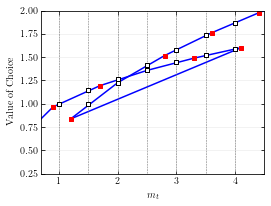

In [11]:
# Initialize the figure
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(1,1,1)

# Plot and scatter
ax.plot(grid_x1,f1(grid_x1), color = 'blue', linewidth = '1.5')
ax.plot(grid_x2,f2(grid_x2), color = 'blue', linewidth = '1.5')
ax.plot([grid_x1[-1], grid_x2[0]] , [f1(grid_x1[-1]), f2(grid_x2[0])], color = 'blue', linewidth = '1.5') # Line to connect graphs
ax.scatter(grid_x1,f1(grid_x1), color = 'red', s = 20, marker = 's', zorder = 2)
ax.scatter(grid_x2,f2(grid_x2), color = 'red', s = 20, marker = 's', zorder = 2)

# Plot exogenous grid
for im in range(len(grid_ex)):
    ax.vlines(grid_ex[im],0,3, linestyle='--', color = '0.4', linewidth = .5)

# Add squared from exogenous grid
ax.scatter(grid_ex[np.where(grid_ex<grid_x1[-1])],f1(grid_ex[np.where(grid_ex<grid_x1[-1])]), color = 'white', s = 20, marker = 's', edgecolor = 'k', alpha = 1, zorder = 2)
ax.scatter(grid_ex[np.where(grid_ex>grid_x2[0])],f2(grid_ex[np.where(grid_ex>grid_x2[0])]), color = 'white', s = 20, marker = 's', edgecolor = 'k', alpha = 1, zorder = 2)

# Inidicate upper envelope
# ax.scatter(grid_ex[:3],f1(grid_ex[:3]), color = '0.8', s = 20, marker = 's', edgecolor = 'k', alpha = 1, zorder = 3)
# ax.scatter(grid_ex[3:],f2(grid_ex[3:]), color = '0.8', s = 20, marker = 's', edgecolor = 'k', alpha = 1, zorder = 3)

# Plot setting
ax.set_xlabel(r'$m_t$')
ax.set_ylabel('Value of Choice')

ax.set_xlim(0.7,4.5)
ax.set_ylim(0.25,2.0)

ax.grid(visible=True, which = 'major', linestyle='-', linewidth=0.5, color='0.9')
ax.tick_params(axis='both',bottom=True,top=True,left=True,right=True,direction='in',which='both')

plt.savefig('../../tex/figs/upper_envelope_raw.pdf')

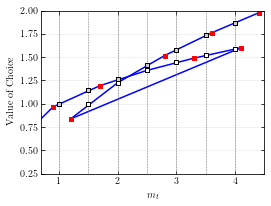

In [12]:
# Initialize the figure
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(1,1,1)

# Plot and scatter
ax.plot(grid_x1,f1(grid_x1), color = 'blue', linewidth = '1.5')
ax.plot(grid_x2,f2(grid_x2), color = 'blue', linewidth = '1.5')
ax.plot([grid_x1[-1], grid_x2[0]] , [f1(grid_x1[-1]), f2(grid_x2[0])], color = 'blue', linewidth = '1.5') # Line to connect graphs
ax.scatter(grid_x1,f1(grid_x1), color = 'red', s = 20, marker = 's', zorder = 2)
ax.scatter(grid_x2,f2(grid_x2), color = 'red', s = 20, marker = 's', zorder = 2)

# Plot exogenous grid
for im in range(len(grid_ex)):
    ax.vlines(grid_ex[im],0,3, linestyle='--', color = '0.4', linewidth = .5)

# Add squared from exogenous grid
ax.scatter(grid_ex[np.where(grid_ex<grid_x1[-1])],f1(grid_ex[np.where(grid_ex<grid_x1[-1])]), color = 'white', s = 20, marker = 's', edgecolor = 'k', alpha = 1, zorder = 2)
ax.scatter(grid_ex[np.where(grid_ex>grid_x2[0])],f2(grid_ex[np.where(grid_ex>grid_x2[0])]), color = 'white', s = 20, marker = 's', edgecolor = 'k', alpha = 1, zorder = 2)

# Inidicate upper envelope
ax.scatter(grid_ex[:3],f1(grid_ex[:3]), color = '0.8', s = 20, marker = 's', edgecolor = 'k', alpha = 1, zorder = 3)
ax.scatter(grid_ex[3:],f2(grid_ex[3:]), color = '0.8', s = 20, marker = 's', edgecolor = 'k', alpha = 1, zorder = 3)

# Plot setting
ax.set_xlabel(r'$m_t$')
ax.set_ylabel('Value of Choice')

ax.set_xlim(0.7,4.5)
ax.set_ylim(0.25,2.0)

ax.grid(visible=True, which = 'major', linestyle='-', linewidth=0.5, color='0.9')
ax.tick_params(axis='both',bottom=True,top=True,left=True,right=True,direction='in',which='both')

plt.savefig('../../tex/figs/upper_envelope_opt.pdf')

# Show Relative Gains in the Toy Model

Set input vectors

In [20]:
h_underbar_vec = [0, 0.05, 0.1, 0.15, 0.2]
m_vec = np.linspace(1,10,200)

Set values

In [21]:
vals = np.zeros(shape=(len(h_underbar_vec),len(m_vec)))

for i in range(len(h_underbar_vec)):
    vals[i] = funcs.Xi(m_vec,h_underbar_vec[i])

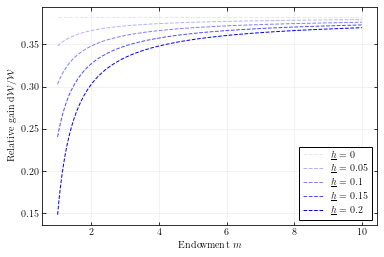

In [64]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)

# ax.plot(m_vec,vals[0,:], color = '0.8', label = r'$\underline{h} = 0$', zorder=2, linewidth = 1)
# ax.plot(m_vec,vals[1,:], color = '0.6', label = r'$\underline{h} = 0.05$', zorder=2, linewidth = 1)
# ax.plot(m_vec,vals[2,:], color = '0.4', label = r'$\underline{h} = 0.1$', zorder=2, linewidth = 1)
# ax.plot(m_vec,vals[3,:], color = '0.2', label = r'$\underline{h} = 0.15$', zorder=2, linewidth = 1)
# ax.plot(m_vec,vals[4,:], color = '0',   label = r'$\underline{h} = 0.2$', zorder=2, linewidth = 1)

ax.plot(m_vec,vals[0,:], color = 'blue', alpha = 0.1, label = r'$\underline{h} = 0$', zorder=2, linewidth = 1, linestyle = '--')
ax.plot(m_vec,vals[1,:], color = 'blue', alpha = 0.3, label = r'$\underline{h} = 0.05$', zorder=2, linewidth = 1, linestyle = '--')
ax.plot(m_vec,vals[2,:], color = 'blue', alpha = 0.5, label = r'$\underline{h} = 0.1$', zorder=2, linewidth = 1, linestyle = '--')
ax.plot(m_vec,vals[3,:], color = 'blue', alpha = 0.7, label = r'$\underline{h} = 0.15$', zorder=2, linewidth = 1, linestyle = '--')
ax.plot(m_vec,vals[4,:], color = 'blue', alpha = 1,   label = r'$\underline{h} = 0.2$', zorder=2, linewidth = 1, linestyle = '--')

# ax.set_xlim(0,.68)
# ax.set_ylim(.1,3.1)
ax.set_xlabel(r'Endowment $m$')
ax.set_ylabel(r'Relative gain $\mathrm{d}\mathcal{W}/\mathcal{W}$')

ax.grid(visible=True, which = 'major', linestyle='-', linewidth=0.5, color='0.9')
ax.tick_params(axis='both',bottom=True,top=True,left=True,right=True,direction='in',which='both')
ax.legend(frameon = True, edgecolor = 'k', facecolor = 'white', framealpha=1, fancybox=False,)

plt.savefig('../../tex/figs/toy_gains.pdf')